[보스턴 집값 예측]

In [182]:
## 모듈로딩 - 데이터 분석용
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [183]:
## 데이터 준비
DATA = '../data/housing.csv'

In [184]:
## - 데이터 로딩
DF = pd.read_csv(DATA, engine='python')
DF

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [185]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     452 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


[2] 데이터 분석 - 탐색적 분석 <hr>

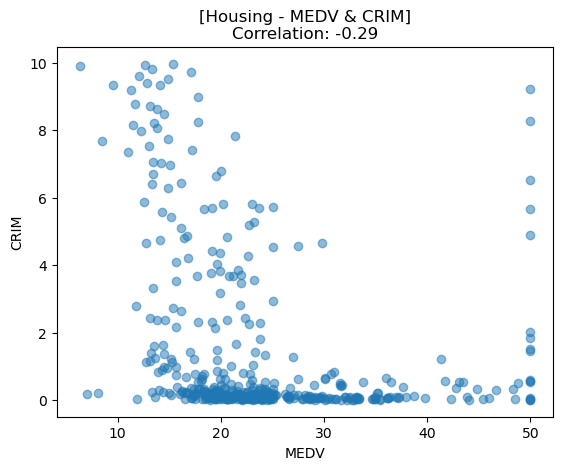

In [186]:
## - 범죄율과 집값(중앙값)의 분포 시각화
# 상관계수 계산
correlation = DF['MEDV'].corr(DF['CRIM'])

# 그래프 그리기
plt.plot(DF['MEDV'], DF['CRIM'], 'o', alpha=0.5)
plt.xlabel('MEDV')
plt.ylabel('CRIM')
plt.title(f'[Housing - MEDV & CRIM]\nCorrelation: {correlation:.2f}')
plt.show()

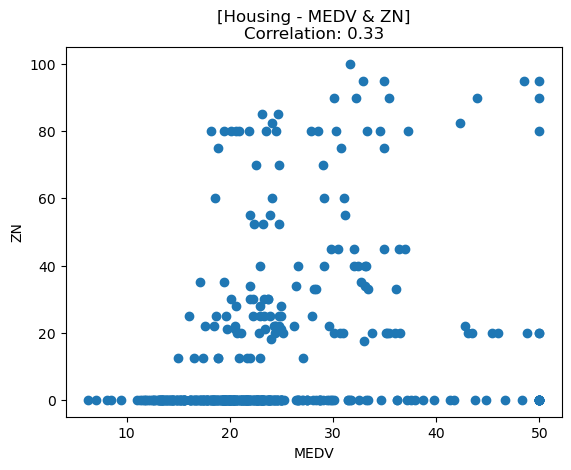

In [187]:
## - 25,000 평방피트 이상의 주거지역 비율(%)과 집값(중앙값)의 분포 시각화
# 상관계수 계산
correlation = DF['MEDV'].corr(DF['ZN'])

# 그래프 그리기
plt.plot(DF['MEDV'], DF['ZN'], 'o')
plt.xlabel('MEDV')
plt.ylabel('ZN')
plt.title(f'[Housing - MEDV & ZN]\nCorrelation: {correlation:.2f}')
plt.show()

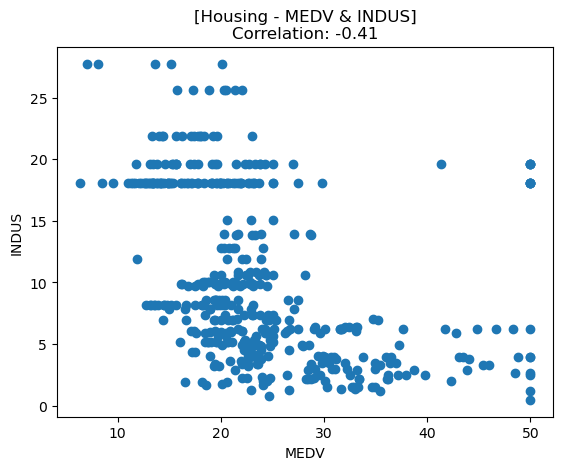

In [188]:
## - 비소매 상업지역 비율(%)과 집값(중앙값)의 분포 시각화
# 상관계수 계산
correlation = DF['MEDV'].corr(DF['INDUS'])

# 그래프 그리기
plt.plot(DF['MEDV'], DF['INDUS'], 'o')
plt.xlabel('MEDV')
plt.ylabel('INDUS')
plt.title(f'[Housing - MEDV & INDUS]\nCorrelation: {correlation:.2f}')
plt.show()

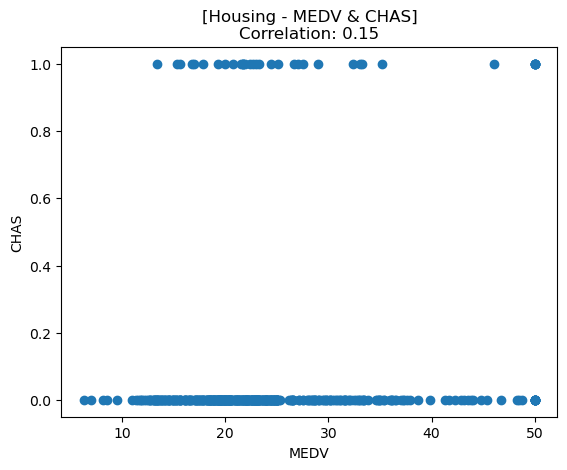

In [189]:
## - 찰스강 인접 여부과 집값(중앙값)의 분포 시각화
# 상관계수 계산
correlation = DF['MEDV'].corr(DF['CHAS'])

plt.plot(DF['MEDV'], DF['CHAS'], 'o')
plt.xlabel('MEDV')
plt.ylabel('CHAS')
plt.title(f'[Housing - MEDV & CHAS]\nCorrelation: {correlation:.2f}')
plt.show()

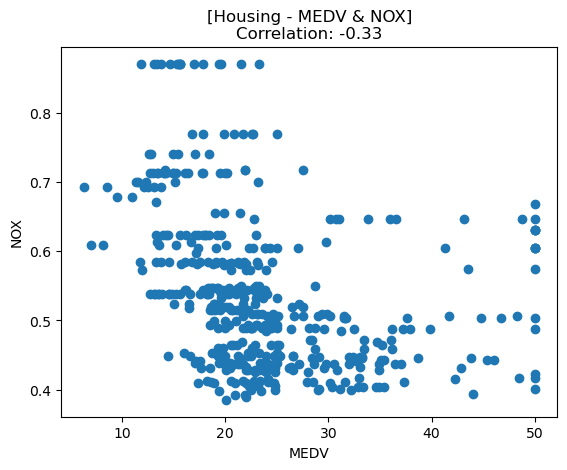

In [190]:
## - 대기 오염 농도 (일산화질소 농도)과 집값(중앙값)의 분포 시각화
# 상관계수 계산
correlation = DF['MEDV'].corr(DF['NOX'])

plt.plot(DF['MEDV'], DF['NOX'], 'o')
plt.xlabel('MEDV')
plt.ylabel('NOX')
plt.title(f'[Housing - MEDV & NOX]\nCorrelation: {correlation:.2f}')
plt.show()

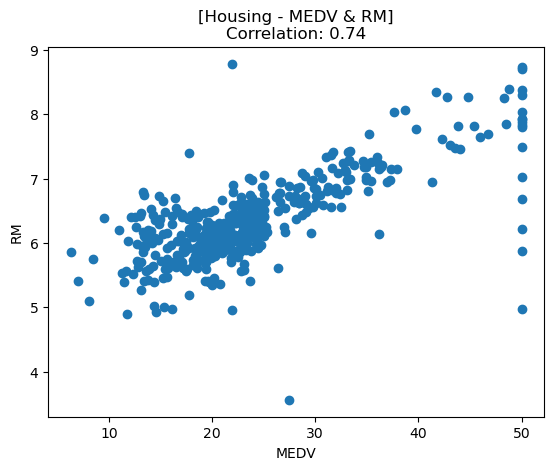

In [191]:
## - 주택당 평균 방 개수과 집값(중앙값)의 분포 시각화
# 상관계수 계산
correlation = DF['MEDV'].corr(DF['RM'])

plt.plot(DF['MEDV'], DF['RM'], 'o')
plt.xlabel('MEDV')
plt.ylabel('RM')
plt.title(f'[Housing - MEDV & RM]\nCorrelation: {correlation:.2f}')
plt.show()

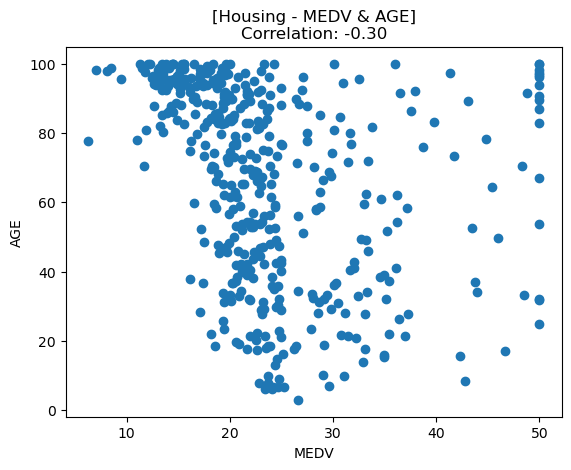

In [192]:
## - 1940년 이전에 건설된 주택 비율(%)과 집값(중앙값)의 분포 시각화
# 상관계수 계산
correlation = DF['MEDV'].corr(DF['AGE'])

plt.plot(DF['MEDV'], DF['AGE'], 'o')
plt.xlabel('MEDV')
plt.ylabel('AGE')
plt.title(f'[Housing - MEDV & AGE]\nCorrelation: {correlation:.2f}')
plt.show()

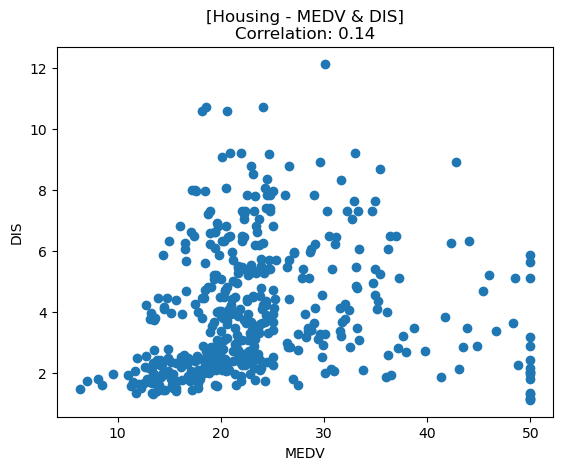

In [193]:
## - 보스턴 5개 고용 중심지까지의 거리 (가중 평균)과 집값(중앙값)의 분포 시각화
# 상관계수 계산
correlation = DF['MEDV'].corr(DF['DIS'])

plt.plot(DF['MEDV'], DF['DIS'], 'o')
plt.xlabel('MEDV')
plt.ylabel('DIS')
plt.title(f'[Housing - MEDV & DIS]\nCorrelation: {correlation:.2f}')
plt.show()

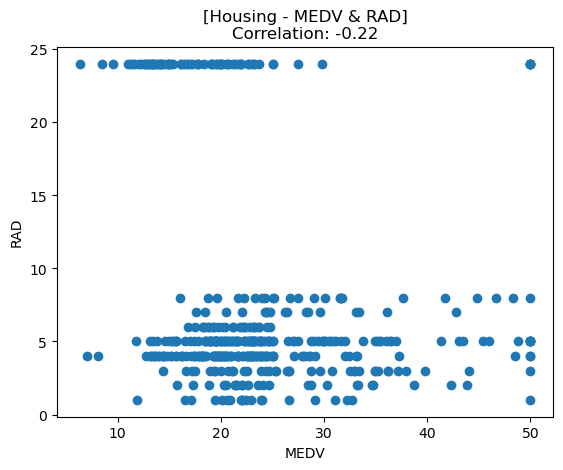

In [194]:
## - 방사형 고속도로 접근성 지수과 집값(중앙값)의 분포 시각화
# 상관계수 계산
correlation = DF['MEDV'].corr(DF['RAD'])

plt.plot(DF['MEDV'], DF['RAD'], 'o')
plt.xlabel('MEDV')
plt.ylabel('RAD')
plt.title(f'[Housing - MEDV & RAD]\nCorrelation: {correlation:.2f}')
plt.show()

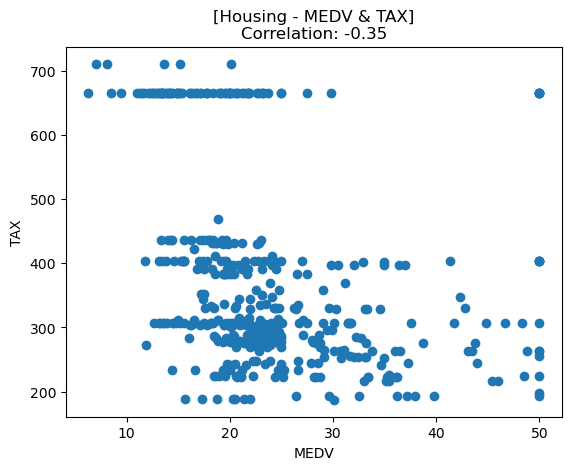

In [195]:
## - 10,000달러당 재산세율과 집값(중앙값)의 분포 시각화
# 상관계수 계산
correlation = DF['MEDV'].corr(DF['TAX'])

plt.plot(DF['MEDV'], DF['TAX'], 'o')
plt.xlabel('MEDV')
plt.ylabel('TAX')
plt.title(f'[Housing - MEDV & TAX]\nCorrelation: {correlation:.2f}')
plt.show()

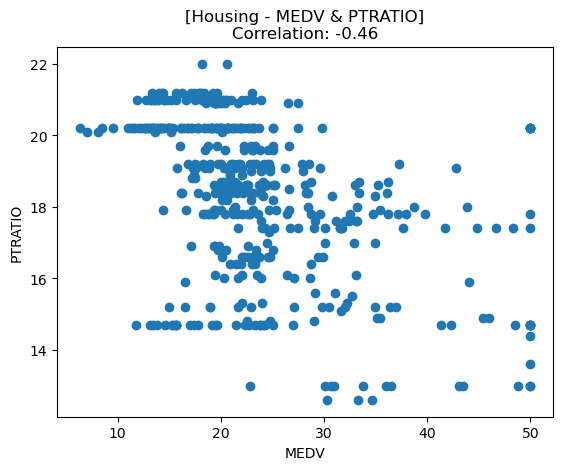

In [196]:
## - 지역별 학생-교사 비율과 집값(중앙값)의 분포 시각화
# 상관계수 계산
correlation = DF['MEDV'].corr(DF['PTRATIO'])

plt.plot(DF['MEDV'], DF['PTRATIO'], 'o')
plt.xlabel('MEDV')
plt.ylabel('PTRATIO')
plt.title(f'[Housing - MEDV & PTRATIO]\nCorrelation: {correlation:.2f}')
plt.show()

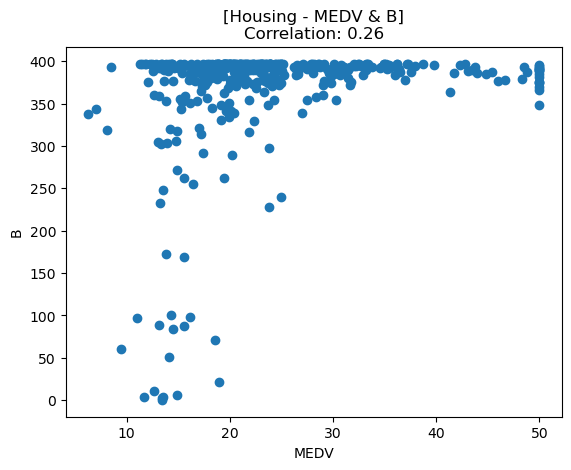

In [197]:
## - 흑인 거주 비율과 집값(중앙값)의 분포 시각화
# 상관계수 계산
correlation = DF['MEDV'].corr(DF['B'])

plt.plot(DF['MEDV'], DF['B'], 'o')
plt.xlabel('MEDV')
plt.ylabel('B')
plt.title(f'[Housing - MEDV & B]\nCorrelation: {correlation:.2f}')
plt.show()

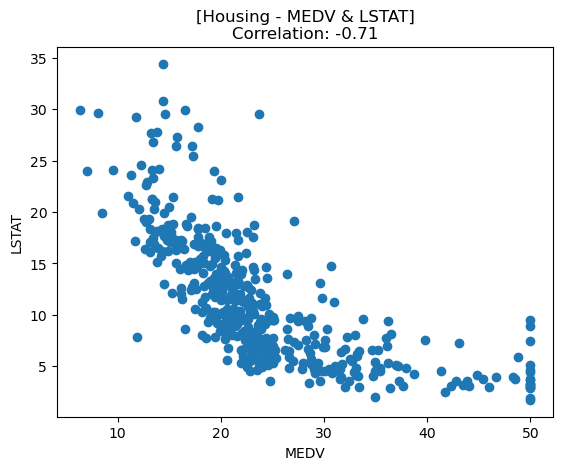

In [198]:
## - 저소득층 비율 (%)과 집값(중앙값)의 분포 시각화
# 상관계수 계산
correlation = DF['MEDV'].corr(DF['LSTAT'])

plt.plot(DF['MEDV'], DF['LSTAT'], 'o')
plt.xlabel('MEDV')
plt.ylabel('LSTAT')
plt.title(f'[Housing - MEDV & LSTAT]\nCorrelation: {correlation:.2f}')
plt.show()

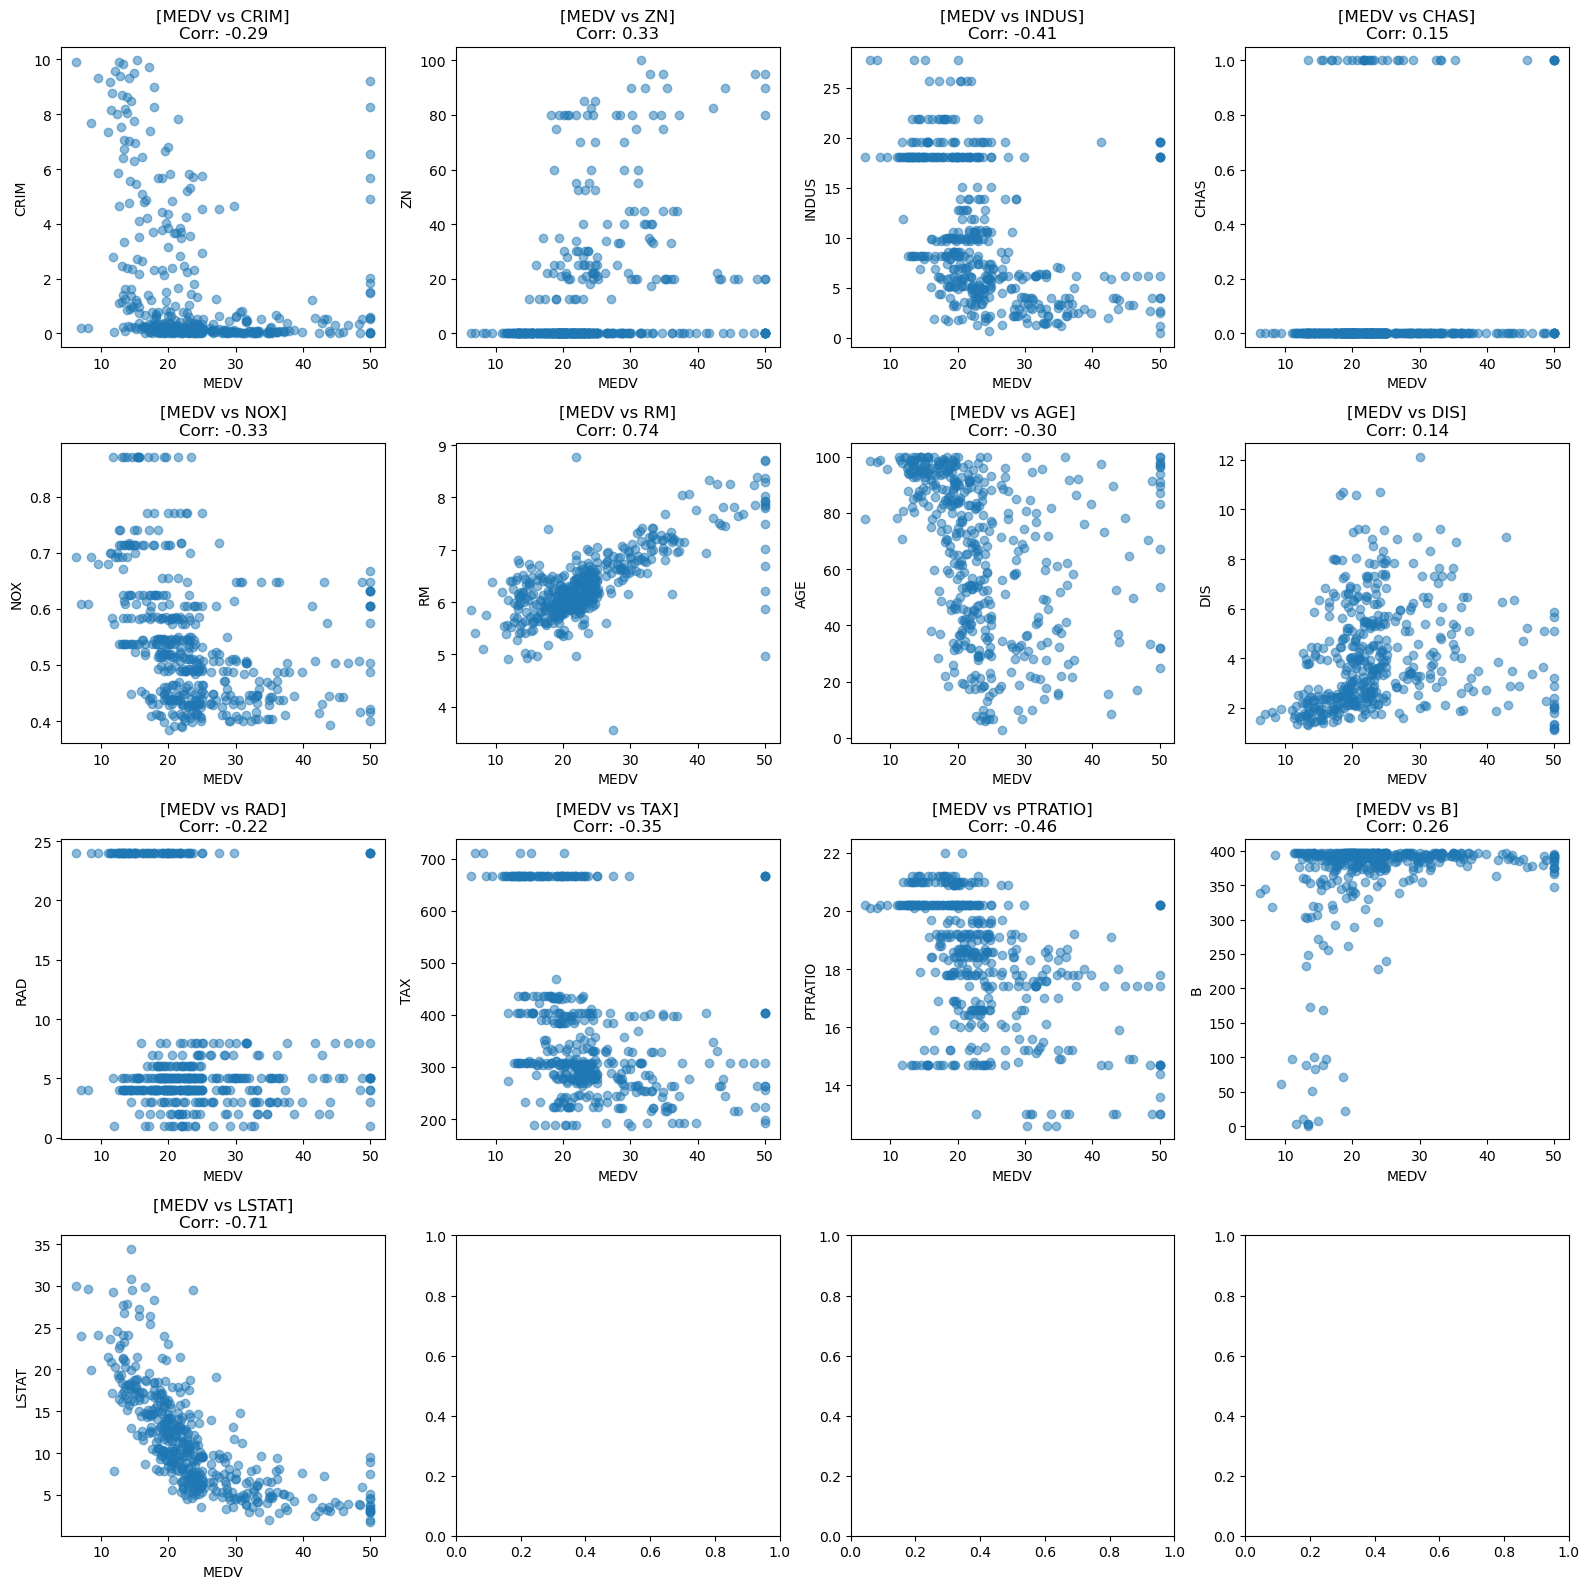

In [199]:
# 대상 컬럼 목록
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# 전체 그래프 크기 및 행, 열 개수 설정
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))  # 4x4 그래프 배치

# 컬럼별 산점도 그래프 생성
for idx, col in enumerate(columns):
    row = idx // 4  # 행 인덱스
    col_idx = idx % 4  # 열 인덱스

    # 각 그래프에 산점도 플롯 추가
    ax = axes[row, col_idx]
    correlation = DF['MEDV'].corr(DF[col])  # 상관계수 계산
    ax.scatter(DF['MEDV'], DF[col], alpha=0.5)
    ax.set_xlabel('MEDV')
    ax.set_ylabel(col)
    ax.set_title(f'[MEDV vs {col}]\nCorr: {correlation:.2f}')


# 전체 레이아웃 조정 및 출력
plt.tight_layout()
plt.show()

In [200]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error
from sklearn.model_selection import train_test_split

medv 연관성 있는 데이터
- RM, LSTAT

In [201]:
# 데이터 준비
feature = DF[['RM', 'LSTAT']]  # 피처: RM, LSTAT
target = DF['MEDV']  # 타겟: MEDV


[3] 데이터셋 준비
- 피처와 타겟 분리
- 학습용/검증용/테스트용 데이터셋 분리 => 학습용과 테스트용으로만 분리

In [202]:
## 3-1 피처와 타겟 분리
featureDF = feature
targetSR = target
print(f"featureDF => {featureDF.ndim}D, targetSr => {targetSR.ndim}D")

featureDF => 2D, targetSr => 1D


In [203]:
# 훈련 데이터와 테스트 데이터로 분리 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(featureDF,
													targetSR,
													test_size=0.2, 
													random_state=10)
print(f"X_train => {X_train.ndim}D {X_train.shape} / X_test => {X_test.ndim}D, {X_test.shape}")
print(f"y_train => {y_train.ndim}D {y_train.shape} / y_test => {X_test.ndim}D, {y_test.shape}")

X_train => 2D (404, 2) / X_test => 2D, (102, 2)
y_train => 1D (404,) / y_test => 2D, (102,)


In [204]:
# X_train과 y_train을 합쳐서 NaN이 포함된 행 전체 제거
train_data = pd.concat([X_train, y_train], axis=1)
train_data = train_data.dropna()

# 다시 분리
X_train = train_data.drop(columns=[y_train.name])  # y_train 컬럼 제외
y_train = train_data[y_train.name]  # y_train 값만 선택

In [205]:
# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [206]:
## 학습 후 모델에 적용되는 a,b: 모델 파라미터
print(f"기울기 / 가중치 model.coef_ {model.coef_}")
print(f"절편값 model.intercept_ {model.intercept_}")

기울기 / 가중치 model.coef_ [ 5.90808327 -0.59178958]
절편값 model.intercept_ -7.052695384877705


[4] 성능 평가 <hr>
- 모델 성능 평가
- 손실 계산

In [207]:
# 예측값 계산
y_pred = model.predict(X_train)
score = model.score(X_train, y_pred)
rmse = root_mean_squared_error(y_train, y_pred)

print(f"X_train score {score}, rmse {rmse}")

X_train score 1.0, rmse 5.00253272535699


In [208]:
# X_test과 y_test을 합쳐서 NaN이 포함된 행 전체 제거
test_data = pd.concat([X_test, y_test], axis=1)
test_data = test_data.dropna()

# 다시 분리
X_test = test_data.drop(columns=[y_test.name])  # y_test 컬럼 제외
y_test = test_data[y_test.name]  # y_test 값만 선택

In [209]:
y_pred = model.predict(X_test)
score = model.score(X_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f"X_test score {score}, rmse {rmse}")

X_test score 1.0, rmse 5.893197117899396


검증용 데이터의 rmse가 높다 => 과대적합

In [210]:
## [4-2] 손실계산 : 검증용 데이터셋으로 예측값 추출 ==> 손실계산
pre_y = model.predict(X_test)

mse = mean_squared_error(y_test, pre_y)
mae = mean_absolute_error(y_test, pre_y)

print(f'mse : {mse}, mae : {mae}')

mse : 34.72977227041774, mae : 4.222282001231218


In [211]:
## - 학습용, 테스트용 DS에 대한 모델 적합도, 비용 계산 
result=[]

for data, label in [[X_train, y_train], [X_test, y_test]]:
    ## - 모델 성능 평가 ==> score(2D_피쳐, 1D_타겟) : 모델 적합도
    score = model.score(data, label)

    ## - 손실 계산 평가 ==> rmse, mse, mae....(1D_타겟, 1D_예측값)
    pre_label = model.predict(data)
    rmse = root_mean_squared_error(label, pre_label)
    mse = mean_squared_error(label, pre_label)
    mae = mean_absolute_error(label,pre_label)

    result.append([score, rmse, mse, mae])

In [212]:
## 성능평가 결과 
resultDF = pd.DataFrame(result, 
                        columns=['score','rmse','mse','mae'],
                        index=['Train','Test'])

In [213]:
## - 훈련용과 테스트용 성능 차이 행 추가 
resultDF.loc['diff']= (resultDF.loc['Train']  - resultDF.loc['Test']).abs()
resultDF

,score,rmse,mse,mae
Train,0.643575,5.002533,25.025334,3.443559
Test,0.640942,5.893197,34.729772,4.222282
diff,0.002633,0.890664,9.704439,0.778723


- [학습 결과 분석]
    * 모델 적합도 : Train > Test : 과대적합 
    * 비용 계산값 : Train < Test : 과대적합

- [해결방안]
    * 과도한  반복 학습 => scikit-learn에서는 개발자 제어 불가 X
    * 모델 복잡한가?  => 피쳐가 많은가? 피쳐는 2개 밖에 없음
    * 데이터가 충분한가? => 데이터 충분하지 않음!
    * 해당 알고리즘의 결과물 분석 => 선형식과 데이터의 관계 => 완벽한 선형이 아님.. 오히려 곡선! 

In [214]:
# 다항 특성 변환 (2차 다항 회귀)
poly = PolynomialFeatures(degree=2)

In [215]:
# 데이터셋 준비 => 학습용, 검증용, 테스트용 
# 학습용 : 규칙과 패턴 찾기 위해 사용되는 데이터셋
# 검증용 : 모델 학습 진행이 제대로 되고 있는지 확인용 데이터셋
# 테스트용 : 학습 완료 후 검사용 데이터셋

# 학습용 피쳐 제공 (학습용을 기준으로 정보 제공)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [216]:
# 모델 초기화
knn = KNeighborsRegressor(n_neighbors=10)
lm = LinearRegression()
plm = LinearRegression()  # 다항 회귀는 선형 회귀 모델로 학습

In [217]:
knn.fit(X_train, y_train)
lm.fit(X_train, y_train)
plm.fit(X_train_poly, y_train)

LinearRegression()

In [218]:
# 모델 예측
y_pred_knn = knn.predict(X_test)
y_pred_lm = lm.predict(X_test)
y_pred_plm = plm.predict(X_test_poly)

In [219]:
# MSE, RMSE, R² 계산 및 출력
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print(f"KNN - MSE: {mse_knn:.4f}, RMSE: {rmse_knn:.4f}, R²: {r2_knn:.4f}")

mse_lm = mean_squared_error(y_test, y_pred_lm)
rmse_lm = np.sqrt(mse_lm)
r2_lm = r2_score(y_test, y_pred_lm)
print(f"Linear Regression - MSE: {mse_lm:.4f}, RMSE: {rmse_lm:.4f}, R²: {r2_lm:.4f}")

mse_plm = mean_squared_error(y_test, y_pred_lm)
rmse_plm = np.sqrt(mse_plm)
r2_plm = r2_score(y_test, y_pred_plm)
print(f"Polynomial Regression - MSE: {mse_plm:.4f}, RMSE: {rmse_plm:.4f}, R²: {r2_plm:.4f}")

KNN - MSE: 29.7924, RMSE: 5.4582, R²: 0.6920
Linear Regression - MSE: 34.7298, RMSE: 5.8932, R²: 0.6409
Polynomial Regression - MSE: 34.7298, RMSE: 5.8932, R²: 0.7443


In [220]:
# 결과 비교 데이터프레임
result = pd.DataFrame([
    [mse_knn, rmse_knn, r2_knn],
    [mse_lm, rmse_lm, r2_lm],
    [mse_plm, rmse_plm, r2_plm]
], columns=['MSE', 'RMSE', 'R² Score'], 
index=['KNN', 'Linear Regression', 'Polynomial Regression'])
result

,MSE,RMSE,R² Score
KNN,29.792433,5.458244,0.691987
Linear Regression,34.729772,5.893197,0.640942
Polynomial Regression,34.729772,5.893197,0.744321


KNN이 가장 좋은 성능을 보임

MSE와 RMSE가 가장 낮아 예측 오차가 적음.
R² Score도 0.7358로 비교적 높음.
KNN이 이번 데이터에서는 가장 적합한 모델.
Polynomial Regression이 Linear Regression보다 성능이 좋음

MSE와 RMSE는 같지만, R² Score가 0.7443으로 더 높음.
선형 회귀보다 다항 회귀가 더 높은 설명력을 가짐.
Linear Regression이 가장 성능이 낮음

MSE와 RMSE가 높고, R² Score가 0.6409로 가장 낮음.
데이터가 단순한 선형 관계보다는 더 복잡한 관계를 가지는 것으로 보임.

[5] 예측 서비스 <hr>

In [221]:
## - 모델이 결정한 선형식기반 결과 예측
pre_medv = model.predict(X_test)

# 모델 예측값과 정답의 차이계산
mse = mean_squared_error(y_test, pre_medv)
#오차평균

mae = mean_absolute_error(y_test,pre_medv)

print(mse, mae)

34.72977227041774 4.222282001231218


In [222]:
# RM과 LSTAT의 범위를 등간격으로 생성
rm_min, rm_max = X_test["RM"].min(), X_test["RM"].max()
lstat_min, lstat_max = X_test["LSTAT"].min(), X_test["LSTAT"].max()

rm_range = np.linspace(rm_min, rm_max, 100).reshape(-1, 1)
lstat_range = np.linspace(lstat_min, lstat_max, 100).reshape(-1, 1)

# LSTAT의 평균값을 사용하여 RM에 대한 예측
lstat_mean = X_test["LSTAT"].mean() if isinstance(X_test, pd.DataFrame) else X_test[:, 1].mean()
rm_lstat_fixed = np.full_like(rm_range, lstat_mean)

# RM과 LSTAT에 대해 2차원 배열 생성
rm_df = pd.DataFrame(np.hstack([rm_range, rm_lstat_fixed]), columns=['RM', 'LSTAT'])
lstat_df = pd.DataFrame(np.hstack([np.full_like(lstat_range, X_test["RM"].mean() if isinstance(X_test, pd.DataFrame) else X_test[:, 0].mean()), lstat_range]), columns=['RM', 'LSTAT'])

# 모델을 사용하여 예측값 계산
y_pred_rm = model.predict(rm_df)
y_pred_lstat = model.predict(lstat_df)


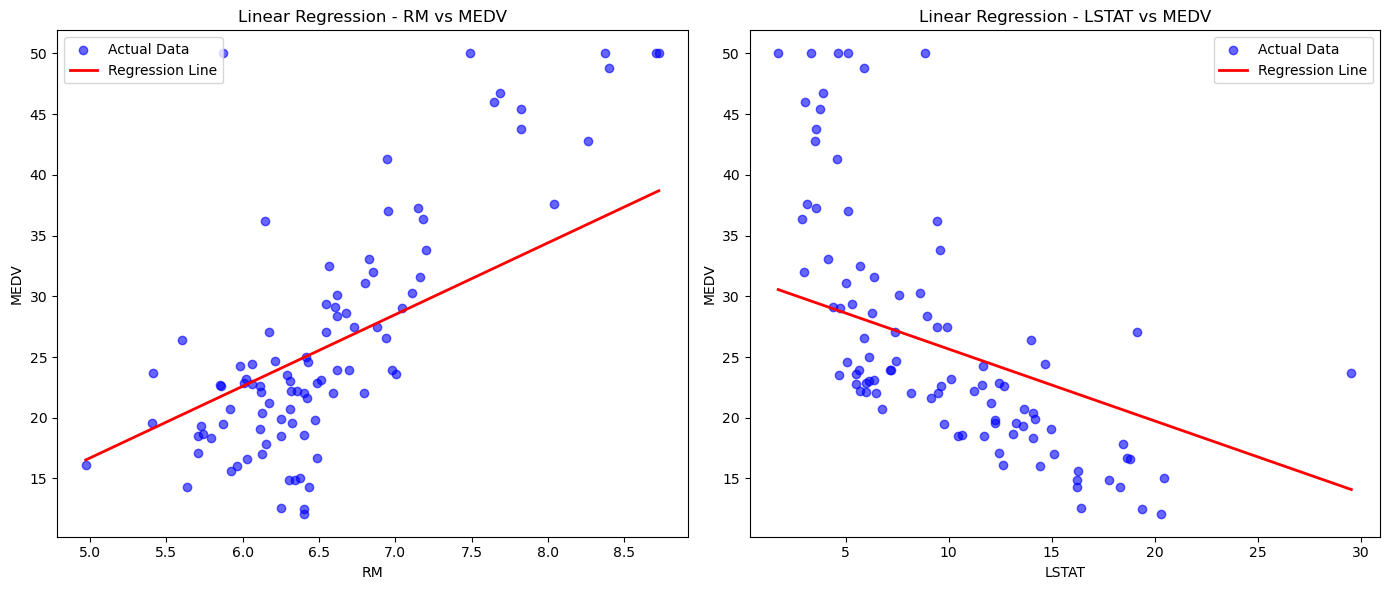

In [223]:
# 서브플롯 생성
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# RM vs MEDV
axes[0].scatter(X_test["RM"] if isinstance(X_test, pd.DataFrame) else X_test[:, 0], y_test, color='blue', label='Actual Data', alpha=0.6)

# RM 기준 회귀선 그리기
axes[0].plot(rm_range, y_pred_rm, color='red', linewidth=2, label='Regression Line')

axes[0].set_xlabel('RM')
axes[0].set_ylabel('MEDV')
axes[0].set_title('Linear Regression - RM vs MEDV')
axes[0].legend()

# LSTAT vs MEDV
axes[1].scatter(X_test["LSTAT"] if isinstance(X_test, pd.DataFrame) else X_test[:, 1], y_test, color='blue', label='Actual Data', alpha=0.6)

# LSTAT 기준 회귀선 그리기
axes[1].plot(lstat_range, y_pred_lstat, color='red', linewidth=2, label='Regression Line')

axes[1].set_xlabel('LSTAT')
axes[1].set_ylabel('MEDV')
axes[1].set_title('Linear Regression - LSTAT vs MEDV')
axes[1].legend()

# 그래프 레이아웃 조정 후 출력
plt.tight_layout()
plt.show()

In [224]:
rm_min, rm_max = X_test["RM"].min(), X_test["RM"].max()
lstat_min, lstat_max = X_test["LSTAT"].min(), X_test["LSTAT"].max()

# RM과 LSTAT의 범위를 등간격으로 생성
rm_range = np.linspace(rm_min, rm_max, 100).reshape(-1, 1)
lstat_range = np.linspace(lstat_min, lstat_max, 100).reshape(-1, 1)

# LSTAT의 평균값을 사용하여 RM에 대한 예측
lstat_mean = X_test["LSTAT"].mean() if isinstance(X_test, pd.DataFrame) else X_test[:, 1].mean()
rm_lstat_fixed = np.full_like(rm_range, lstat_mean)

# RM과 LSTAT에 대해 2차원 배열 생성
rm_df = np.hstack([rm_range, rm_lstat_fixed])
lstat_df = np.hstack([np.full_like(lstat_range, X_test["RM"].mean() if isinstance(X_test, pd.DataFrame) else X_test[:, 0].mean()), lstat_range])

# 다항 회귀 변환 적용 (이 부분이 중요!)
rm_df_poly = poly.transform(rm_df)
lstat_df_poly = poly.transform(lstat_df)

# 다항 회귀 모델을 사용하여 예측값 계산
y_pred_rm = plm.predict(rm_df_poly)
y_pred_lstat = plm.predict(lstat_df_poly)

c:\Users\KDP-35\anaconda3\envs\ML_PY39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\KDP-35\anaconda3\envs\ML_PY39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


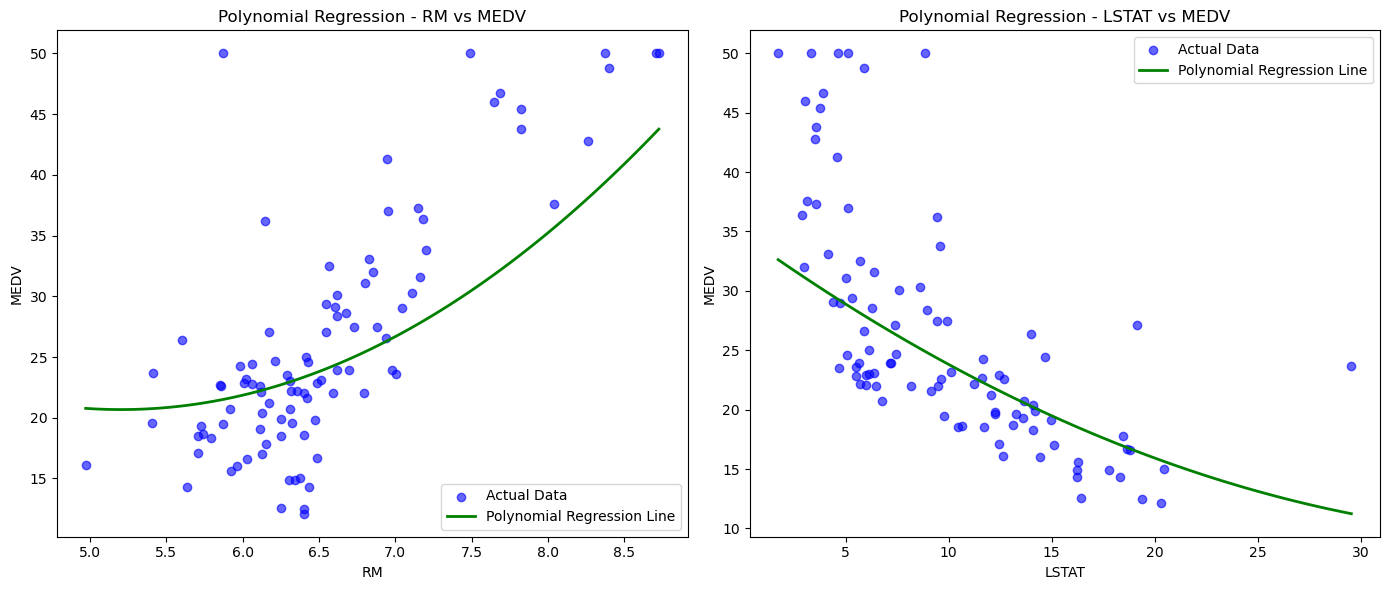

In [225]:
rm_values = X_test["RM"].values
lstat_values = X_test["LSTAT"].values

# 서브플롯 생성
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# RM vs MEDV
axes[0].scatter(rm_values, y_test, color='blue', label='Actual Data', alpha=0.6)

# RM 기준 다항 회귀선 그리기
axes[0].plot(rm_range, y_pred_rm, color='green', linewidth=2, label='Polynomial Regression Line')

axes[0].set_xlabel('RM')
axes[0].set_ylabel('MEDV')
axes[0].set_title('Polynomial Regression - RM vs MEDV')
axes[0].legend()

# LSTAT vs MEDV
axes[1].scatter(lstat_values, y_test, color='blue', label='Actual Data', alpha=0.6)

# LSTAT 기준 다항 회귀선 그리기
axes[1].plot(lstat_range, y_pred_lstat, color='green', linewidth=2, label='Polynomial Regression Line')

axes[1].set_xlabel('LSTAT')
axes[1].set_ylabel('MEDV')
axes[1].set_title('Polynomial Regression - LSTAT vs MEDV')
axes[1].legend()

# 그래프 레이아웃 조정 후 출력
plt.tight_layout()
plt.show()


In [226]:
rm_values = X_test["RM"].values
lstat_values = X_test["LSTAT"].values

# RM과 LSTAT 값의 최소, 최대 구하기
rm_min, rm_max = rm_values.min(), rm_values.max()
lstat_min, lstat_max = lstat_values.min(), lstat_values.max()

# RM과 LSTAT의 범위를 등간격으로 생성
rm_range = np.linspace(rm_min, rm_max, 100).reshape(-1, 1)
lstat_range = np.linspace(lstat_min, lstat_max, 100).reshape(-1, 1)

# LSTAT의 평균값을 사용하여 RM에 대한 예측
lstat_mean = np.mean(lstat_values)
rm_lstat_fixed = np.full_like(rm_range, lstat_mean)

# RM과 LSTAT에 대해 2차원 배열 생성
rm_df = np.hstack([rm_range, rm_lstat_fixed])
lstat_df = np.hstack([np.full_like(lstat_range, np.mean(rm_values)), lstat_range])

# KNN 회귀 모델을 사용하여 예측값 계산
y_pred_rm = knn.predict(rm_df)
y_pred_lstat = knn.predict(lstat_df)

c:\Users\KDP-35\anaconda3\envs\ML_PY39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\Users\KDP-35\anaconda3\envs\ML_PY39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


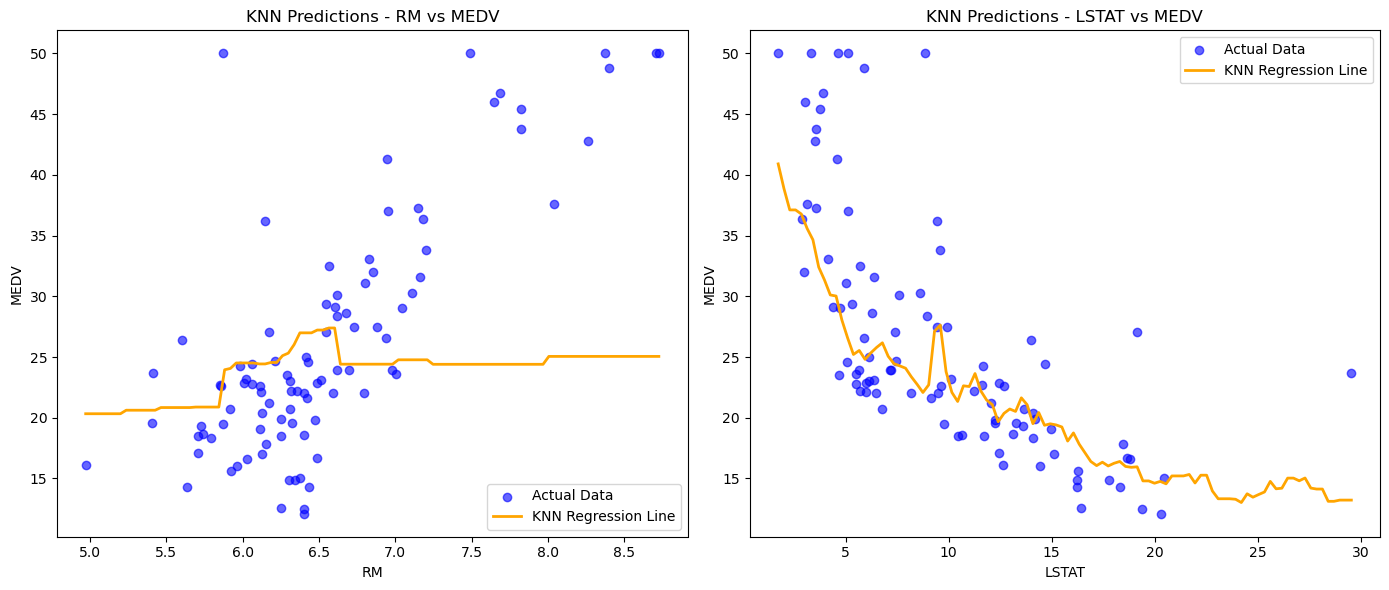

In [227]:
# 서브플롯 생성
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# RM vs MEDV
axes[0].scatter(rm_values, y_test, color='blue', label='Actual Data', alpha=0.6)

# RM 기준 KNN 예측선 그리기
axes[0].plot(rm_range, y_pred_rm, color='orange', linewidth=2, label='KNN Regression Line')

axes[0].set_xlabel('RM')
axes[0].set_ylabel('MEDV')
axes[0].set_title('KNN Predictions - RM vs MEDV')
axes[0].legend()

# LSTAT vs MEDV
axes[1].scatter(lstat_values, y_test, color='blue', label='Actual Data', alpha=0.6)

# LSTAT 기준 KNN 예측선 그리기
axes[1].plot(lstat_range, y_pred_lstat, color='orange', linewidth=2, label='KNN Regression Line')

axes[1].set_xlabel('LSTAT')
axes[1].set_ylabel('MEDV')
axes[1].set_title('KNN Predictions - LSTAT vs MEDV')
axes[1].legend()

# 그래프 레이아웃 조정 후 출력
plt.tight_layout()
plt.show()

In [228]:
new_data = [[13, 15]]

pre_medv = model.predict(new_data)

print(f" 예상 medv 는 {pre_medv[0]:.2f}입니다 ")

 예상 medv 는 60.88입니다 


c:\Users\KDP-35\anaconda3\envs\ML_PY39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [229]:
from sklearn.preprocessing import StandardScaler

In [230]:
# StandardScaler 초기화 및 학습 (X_train을 사용하여 피팅)
scaler = StandardScaler()
scaler.fit(X_train)  # 기존 학습 데이터(X_train)로 스케일러 학습

StandardScaler()

In [231]:
# 새로운 데이터 (RM=13, LSTAT=15)
new_data = np.array([[13, 15]])
new_data_scaled = scaler.transform(new_data)  # 표준화 변환
new_data_poly = poly.transform(new_data_scaled)  # 다항 특성 변환

# 각 모델을 사용하여 예측
pred_knn = knn.predict(new_data_scaled)
pred_lm = lm.predict(new_data_scaled)
pred_plm = plm.predict(new_data_poly)

# 예측값 출력
print(f"새로운 데이터 (RM=13, LSTAT=15)의 예측값")
print(f"KNN 예측값: {pred_knn[0]:.2f}")
print(f"Linear Regression 예측값: {pred_lm[0]:.2f}")
print(f"Polynomial Regression 예측값: {pred_plm[0]:.2f}")

새로운 데이터 (RM=13, LSTAT=15)의 예측값
KNN 예측값: 45.64
Linear Regression 예측값: 54.34
Polynomial Regression 예측값: 91.00


c:\Users\KDP-35\anaconda3\envs\ML_PY39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\KDP-35\anaconda3\envs\ML_PY39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\KDP-35\anaconda3\envs\ML_PY39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\Users\KDP-35\anaconda3\envs\ML_PY39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [232]:
# RMSE 계산 함수 정의
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [233]:
import numpy as np
from sklearn.model_selection import KFold

In [234]:
# KFold 설정 (5개 폴드)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [235]:
# 선형 회귀 모델 생성
lr = LinearRegression()

In [236]:
# 결과 저장용 DataFrame 초기화
resultDF = pd.DataFrame(columns=["R² Score", "RMSE Loss"])

In [237]:
# 교차 검증 진행
for i, (train_index, test_index) in enumerate(kf.split(X_train, y_train)):
    print("=" * 50)
    print(f"Fold {i+1}")
    
    # 학습용 및 테스트용 데이터 분리
    train_data, train_label = X_train.iloc[train_index], y_train.iloc[train_index]
    test_data, test_label = X_train.iloc[test_index], y_train.iloc[test_index]
    
    # 현재 학습 데이터의 컬럼 확인
    print(f"Feature Columns: {list(train_data.columns)}")

    # 모델 학습
    lr.fit(train_data, train_label)

    # 성능 평가 (R² Score)
    train_score = lr.score(train_data, train_label)
    test_score = lr.score(test_data, test_label)

    # 손실 계산 (RMSE)
    train_loss = root_mean_squared_error(train_label, lr.predict(train_data))
    test_loss = root_mean_squared_error(test_label, lr.predict(test_data))

    # 결과 저장
    resultDF.loc[f'Fold_{i+1}_Train'] = [train_score, train_loss]
    resultDF.loc[f'Fold_{i+1}_Test'] = [test_score, test_loss]

    print(f"Train R² Score: {train_score:.4f}, Train RMSE: {train_loss:.4f}")
    print(f"Test  R² Score: {test_score:.4f}, Test  RMSE: {test_loss:.4f}")
    
print("최종 교차 검증 결과")
display(resultDF)

Fold 1
Feature Columns: ['RM', 'LSTAT']
Train R² Score: 0.6235, Train RMSE: 5.1078
Test  R² Score: 0.6941, Test  RMSE: 4.6200
Fold 2
Feature Columns: ['RM', 'LSTAT']
Train R² Score: 0.6333, Train RMSE: 4.8473
Test  R² Score: 0.6527, Test  RMSE: 5.6376
Fold 3
Feature Columns: ['RM', 'LSTAT']
Train R² Score: 0.6605, Train RMSE: 5.0548
Test  R² Score: 0.5275, Test  RMSE: 4.8041
Fold 4
Feature Columns: ['RM', 'LSTAT']
Train R² Score: 0.6379, Train RMSE: 5.0396
Test  R² Score: 0.6474, Test  RMSE: 4.9016
Fold 5
Feature Columns: ['RM', 'LSTAT']
Train R² Score: 0.6634, Train RMSE: 4.9110
Test  R² Score: 0.5354, Test  RMSE: 5.4017
최종 교차 검증 결과


,R² Score,RMSE Loss
Fold_1_Train,0.623453,5.107778
Fold_1_Test,0.694110,4.619994
Fold_2_Train,0.633338,4.847279
Fold_2_Test,0.652671,5.637579
Fold_3_Train,0.660527,5.054817
Fold_3_Test,0.527545,4.804064
Fold_4_Train,0.637881,5.039638
Fold_4_Test,0.647433,4.901573
Fold_5_Train,0.663442,4.911012
Fold_5_Test,0.535359,5.401701


In [238]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [239]:
# 결과 저장용 DataFrame 초기화
resultDF = pd.DataFrame(columns=['alpha', 'train_score', 'test_score', 'train_loss', 'test_loss'])

In [240]:
# 교차검증 설정 (5개 폴드)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [241]:
# alpha 값에 따른 Ridge 모델 성능 비교
for alpha in [0.1, 0.5, 1.0, 1.5, 2]:
	## 선형회귀 모델 객체 생성
	lr = Ridge(alpha)

	train_stotal, test_stotal = 0, 0
	train_ltotal, test_ltotal = 0, 0
	for i, (train_index, test_index) in enumerate(kf.split(X_train, y_train)):
		## - 학습용/테스트용 피쳐와 타겟 추출
		train_data, train_label = X_train.iloc[train_index, 1:], y_train.iloc[train_index]
		test_data, test_label = X_train.iloc[test_index, 1:], y_train.iloc[test_index]

		print(type(train_data))

		## - 학습
		lr.fit(train_data, train_label)

		## - 성능평가
		train_score = lr.score(train_data, train_label)
		test_score = lr.score(test_data, test_label)

		## - 손실계산
		train_loss = root_mean_squared_error(train_label, lr.predict(train_data))
		test_loss = root_mean_squared_error(test_label, lr.predict(test_data))

		## - 성능값과 손실값 누적
		train_stotal += train_score
		test_stotal += test_score
		train_ltotal += train_loss
		test_ltotal += test_loss

	## alpha값 별로 성능과 손실값 평균 자랑하기
	resultDF.loc[f'alpha_{alpha}'] = [alpha, train_stotal/5, test_stotal/5, train_ltotal/5, test_ltotal/5]

## - 결과 확인
resultDF

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


,alpha,train_score,test_score,train_loss,test_loss
alpha_0.1,0.1,0.512025,0.492989,5.846355,5.848535
alpha_0.5,0.5,0.512025,0.492990,5.846355,5.848530
alpha_1.0,1.0,0.512025,0.492992,5.846355,5.848522
alpha_1.5,1.5,0.512025,0.492993,5.846355,5.848515
alpha_2,2.0,0.512025,0.492995,5.846355,5.848508


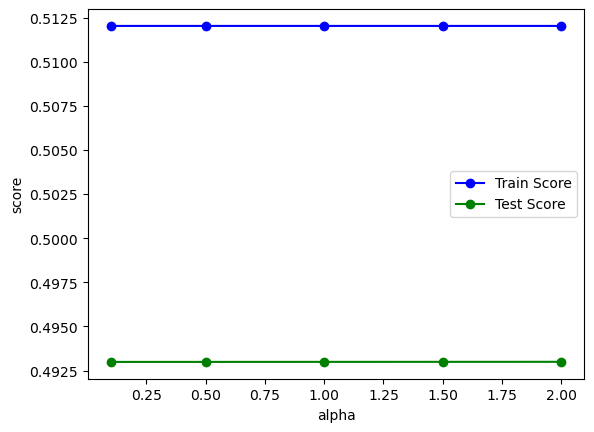

In [242]:
plt.plot(resultDF['alpha'], resultDF['train_score'], 'bo-', label = 'Train Score')
plt.plot(resultDF['alpha'], resultDF['test_score'], 'go-', label = 'Test Score')
plt.xlabel('alpha')
plt.ylabel('score')
plt.legend()
plt.show()

alpha 값이 증가할수록:

- Train Score(train_score)와 Test Score(test_score) 값이 거의 변하지 않음 → 즉, 규제 강도를 변경해도 모델의 설명력이 유지됨.
- Train Loss(train_loss)와 Test Loss(test_loss)도 거의 변하지 않음 → RMSE 값이 거의 같음.
- 일반적으로 alpha가 너무 크면 과소적합(underfitting), 너무 작으면 과적합(overfitting)이 발생하지만,
→ 여기서는 alpha 값 변화가 모델 성능에 큰 영향을 주지 않음.